In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. Removing more columns to try and optimize the model
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN', 'NAME', 'ORGANIZATION'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
value_counts_classification1 = application_df.INCOME_AMT.value_counts()
value_counts_classification1

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(value_counts_classification1[value_counts_classification1 < 20000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0        24388
Other     9911
Name: INCOME_AMT, dtype: int64

In [6]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
value_counts_classification = application_df.CLASSIFICATION.value_counts()
replace_class = list(value_counts_classification[value_counts_classification < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [7]:
# Look at ask_amt value counts for binning
value_counts_askamount = application_df.ASK_AMT.value_counts()
value_counts_askamount

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

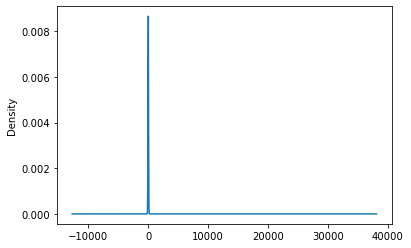

In [8]:
value_counts_askamount.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(value_counts_askamount[value_counts_askamount<5].index)

# Replace in dataframe
for app in replace_application:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(app,5001)
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()


5000    25398
5001     8901
Name: ASK_AMT, dtype: int64

In [10]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [12]:
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
input_layer_test = len(X_train_scaled[0])
input_layer_test

40

In [16]:
input_layer = 40
hidden_layer1 = 10
hidden_layer2 = 6
hidden_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, input_dim=input_layer, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2, input_dim=input_layer, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer3, input_dim=input_layer, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                410       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [17]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt/",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights.{epoch:02d}.hdf5"

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [20]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
 76/804 [=>............................] - ETA: 0s - loss: 0.7922 - accuracy: 0.4811
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
194/804 [======>.......................] - ETA: 0s - loss: 0.7358 - accuracy: 0.4686
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
269/804 [=========>....................] - ETA: 0s - loss: 0.7126 - accuracy: 0.5253
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
381/804 [=============>................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5776
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6714 - accuracy: 0.6125
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6619 - accuracy: 0.6268
Epoch 00001: saving model to checkpoints_opt\weights.01.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6496 - accuracy: 0.6439
Epoch 00001: saving model to

447/804 [===============>..............] - ETA: 0s - loss: 0.5672 - accuracy: 0.7239
Epoch 00007: saving model to checkpoints_opt\weights.07.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5657 - accuracy: 0.7244
Epoch 00007: saving model to checkpoints_opt\weights.07.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5658 - accuracy: 0.7239
Epoch 00007: saving model to checkpoints_opt\weights.07.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5662 - accuracy: 0.7242
Epoch 00007: saving model to checkpoints_opt\weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5666 - accuracy: 0.7245
Epoch 8/50
 47/804 [>.............................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7500
Epoch 00008: saving model to checkpoints_opt\weights.08.hdf5
170/804 [=====>........................] - ETA: 0s - loss: 0.5534 - accuracy: 0.7381
Epoch 00008: saving model to checkpoints_opt\weights.08.hdf5
248/804 [========>......

804/804 [==============================] - 1s 1ms/step - loss: 0.5643 - accuracy: 0.7238
Epoch 14/50
 46/804 [>.............................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
129/804 [===>..........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.7231
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7230
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7210
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.5681 - accuracy: 0.7204
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5657 - accuracy: 0.7223
Epoch 00014: saving model to checkpoints_opt\weights.14.hdf5
628/804 [==============

315/804 [==========>...................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7236
Epoch 00020: saving model to checkpoints_opt\weights.20.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7252
Epoch 00020: saving model to checkpoints_opt\weights.20.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.5604 - accuracy: 0.7261
Epoch 00020: saving model to checkpoints_opt\weights.20.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5623 - accuracy: 0.7254
Epoch 00020: saving model to checkpoints_opt\weights.20.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5629 - accuracy: 0.7244
Epoch 00020: saving model to checkpoints_opt\weights.20.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5629 - accuracy: 0.7250
Epoch 21/50
  1/804 [..............................] - ETA: 1s - loss: 0.7510 - accuracy: 0.5938
Epoch 00021: saving model to checkpoints_opt\weights.21.hdf5
108/804 [===>..........

Epoch 00026: saving model to checkpoints_opt\weights.26.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5606 - accuracy: 0.7254
Epoch 00026: saving model to checkpoints_opt\weights.26.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7248
Epoch 00026: saving model to checkpoints_opt\weights.26.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5619 - accuracy: 0.7251
Epoch 27/50
 84/804 [==>...........................] - ETA: 0s - loss: 0.5548 - accuracy: 0.7281
Epoch 00027: saving model to checkpoints_opt\weights.27.hdf5
188/804 [======>.......................] - ETA: 0s - loss: 0.5592 - accuracy: 0.7241
Epoch 00027: saving model to checkpoints_opt\weights.27.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7233
Epoch 00027: saving model to checkpoints_opt\weights.27.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5607 - accuracy: 0.7252
Epoch 00027: saving mod

158/804 [====>.........................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7191
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
240/804 [=======>......................] - ETA: 0s - loss: 0.5647 - accuracy: 0.7171
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5641 - accuracy: 0.7202
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.5647 - accuracy: 0.7200
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5629 - accuracy: 0.7222
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5641 - accuracy: 0.7206
Epoch 00033: saving model to checkpoints_opt\weights.33.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5610 - accuracy: 0.7242
Epoch 00033: saving model to checkpoint

540/804 [===================>..........] - ETA: 0s - loss: 0.5623 - accuracy: 0.7225
Epoch 00039: saving model to checkpoints_opt\weights.39.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5622 - accuracy: 0.7230
Epoch 00039: saving model to checkpoints_opt\weights.39.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5602 - accuracy: 0.7255
Epoch 00039: saving model to checkpoints_opt\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5606 - accuracy: 0.7250
Epoch 40/50
 43/804 [>.............................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7231
Epoch 00040: saving model to checkpoints_opt\weights.40.hdf5
120/804 [===>..........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7385
Epoch 00040: saving model to checkpoints_opt\weights.40.hdf5
244/804 [========>.....................] - ETA: 0s - loss: 0.5455 - accuracy: 0.7390
Epoch 00040: saving model to checkpoints_opt\weights.40.hdf5
325/804 [===========>..

  1/804 [..............................] - ETA: 1s - loss: 0.5876 - accuracy: 0.7188
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
 79/804 [=>............................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7203
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
170/804 [=====>........................] - ETA: 0s - loss: 0.5623 - accuracy: 0.7197
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7224
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5580 - accuracy: 0.7260
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.5594 - accuracy: 0.7247
Epoch 00046: saving model to checkpoints_opt\weights.46.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5598 - accuracy: 0.7251
Epoch 00046: saving model to checkpoint

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5633 - accuracy: 0.7202
Loss: 0.5633458495140076, Accuracy: 0.7202332615852356
